In [0]:
# IMPORT GENERIC PACKAGES
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(20,10)})

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet
from sklearn import metrics
from sklearn.datasets import make_regression

In [0]:
data = pd.read_csv("nyc-rolling-sales.csv")
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors = 'coerce') 
data['GROSS SQUARE FEET'] = pd.to_numeric(data['GROSS SQUARE FEET'], errors = 'coerce') 
data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'], errors = 'coerce') 

In [0]:
data['SALE PRICE'] = data['SALE PRICE'].fillna(0)
data['LAND SQUARE FEET'] = data['LAND SQUARE FEET'].fillna(0)
data['GROSS SQUARE FEET'] = data['GROSS SQUARE FEET'].fillna(0)
data = data.drop(columns=['Unnamed: 0'])
data = data.drop(columns=['BLOCK'])
data = data.drop(columns=['LOT'])
data = data.drop(columns=['ADDRESS'])
data = data.drop(columns=['APARTMENT NUMBER'])
data = data.drop(columns=['EASE-MENT'])
data = data.drop(columns=['SALE DATE'])

data.NEIGHBORHOOD = pd.Categorical(data['NEIGHBORHOOD'])
data['NEIGHBORHOOD'] = data.NEIGHBORHOOD.cat.codes

data.rename(columns={'BUILDING CLASS CATEGORY': 'BUILDING_CLASS_CATEGORY', 'TAX CLASS AT PRESENT': 'TAX_CLASS_AT_PRESENT', 'BUILDING CLASS AT PRESENT': 'BUILDING_CLASS_AT_PRESENT', 'TAX CLASS AT TIME OF SALE': 'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING CLASS AT TIME OF SALE': 'BUILDING_CLASS_AT_TIME_OF_SALE'}, inplace=True)

data.BUILDING_CLASS_CATEGORY = pd.Categorical(data['BUILDING_CLASS_CATEGORY'])
data['BUILDING_CLASS_CATEGORY'] = data.BUILDING_CLASS_CATEGORY.cat.codes

data.TAX_CLASS_AT_PRESENT = pd.Categorical(data['TAX_CLASS_AT_PRESENT'])
data['TAX_CLASS_AT_PRESENT'] = data.TAX_CLASS_AT_PRESENT.cat.codes

data.BUILDING_CLASS_AT_PRESENT = pd.Categorical(data['BUILDING_CLASS_AT_PRESENT'])
data['BUILDING_CLASS_AT_PRESENT'] = data.BUILDING_CLASS_AT_PRESENT.cat.codes

data.TAX_CLASS_AT_TIME_OF_SALE = pd.Categorical(data['TAX_CLASS_AT_TIME_OF_SALE'])
data['TAX_CLASS_AT_TIME_OF_SALE'] = data.TAX_CLASS_AT_TIME_OF_SALE.cat.codes

data.BUILDING_CLASS_AT_TIME_OF_SALE = pd.Categorical(data['BUILDING_CLASS_AT_TIME_OF_SALE'])
data['BUILDING_CLASS_AT_TIME_OF_SALE'] = data.BUILDING_CLASS_AT_TIME_OF_SALE.cat.codes

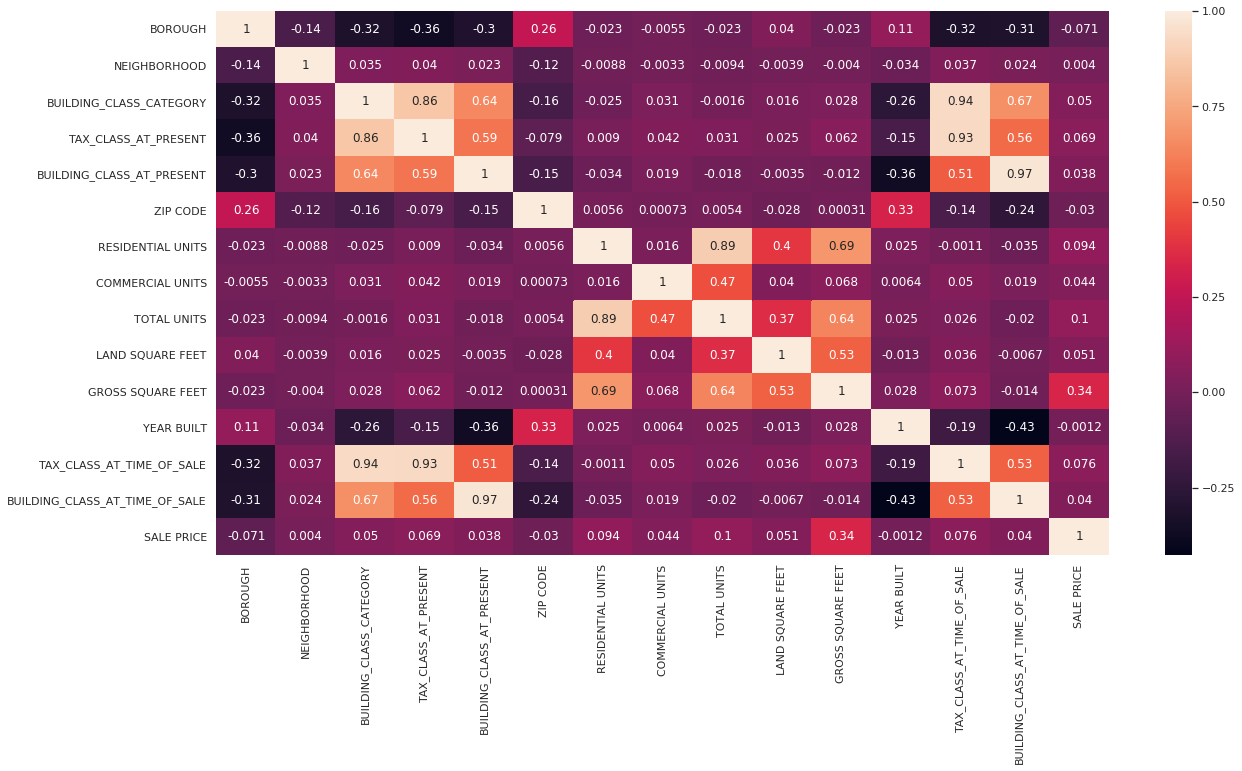

In [4]:
sns.heatmap(data.corr(), annot=True)

In [5]:
new_data = data[(data['SALE PRICE'] > 1000000) & (data['SALE PRICE'] < 3250000)]
new_data.describe()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BUILDING_CLASS_AT_PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE PRICE
count,11736.000000,11736.000000,11736.000000,11736.000000,11736.000000,11736.000000,11736.000000,11736.000000,11736.000000,11736.000000,11736.000000,11736.00000,11736.000000,11736.000000,1.173600e+04
mean,2.288855,127.614945,9.223160,4.214894,65.940525,10560.995484,1.467791,0.114945,1.595518,1571.660702,1521.657635,1755.80939,0.804448,66.736793,1.677398e+06
std,1.211885,78.593428,7.220601,2.528610,53.291414,1321.682036,3.258339,0.632721,3.368782,7855.790202,7227.747091,586.92935,0.700855,53.072627,5.619890e+05
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.001958e+06
25%,1.000000,62.000000,2.000000,1.000000,14.000000,10022.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1910.00000,0.000000,13.000000,1.230000e+06
50%,3.000000,111.000000,9.000000,5.000000,29.000000,11106.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1931.00000,1.000000,34.000000,1.500000e+06
75%,3.000000,220.000000,13.000000,5.000000,121.000000,11225.000000,2.000000,0.000000,2.000000,2204.000000,2480.000000,1985.00000,1.000000,120.000000,2.000000e+06
max,5.000000,253.000000,45.000000,10.000000,166.000000,11694.000000,193.000000,35.000000,193.000000,784218.000000,600613.000000,2016.00000,3.000000,165.000000,3.248000e+06


In [6]:
features = ['BOROUGH', 'NEIGHBORHOOD', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BUILDING_CLASS_CATEGORY', 'BUILDING_CLASS_AT_TIME_OF_SALE', 'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_PRESENT', 'TAX_CLASS_AT_PRESENT', 'YEAR BUILT']
#features = ['BOROUGH', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE', 'YEAR BUILT']
x = new_data[features]
y = new_data['SALE PRICE']
new_data.describe()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BUILDING_CLASS_AT_PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE PRICE
count,11736.000000,11736.000000,11736.000000,11736.000000,11736.000000,11736.000000,11736.000000,11736.000000,11736.000000,11736.000000,11736.000000,11736.00000,11736.000000,11736.000000,1.173600e+04
mean,2.288855,127.614945,9.223160,4.214894,65.940525,10560.995484,1.467791,0.114945,1.595518,1571.660702,1521.657635,1755.80939,0.804448,66.736793,1.677398e+06
std,1.211885,78.593428,7.220601,2.528610,53.291414,1321.682036,3.258339,0.632721,3.368782,7855.790202,7227.747091,586.92935,0.700855,53.072627,5.619890e+05
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.001958e+06
25%,1.000000,62.000000,2.000000,1.000000,14.000000,10022.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1910.00000,0.000000,13.000000,1.230000e+06
50%,3.000000,111.000000,9.000000,5.000000,29.000000,11106.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1931.00000,1.000000,34.000000,1.500000e+06
75%,3.000000,220.000000,13.000000,5.000000,121.000000,11225.000000,2.000000,0.000000,2.000000,2204.000000,2480.000000,1985.00000,1.000000,120.000000,2.000000e+06
max,5.000000,253.000000,45.000000,10.000000,166.000000,11694.000000,193.000000,35.000000,193.000000,784218.000000,600613.000000,2016.00000,3.000000,165.000000,3.248000e+06


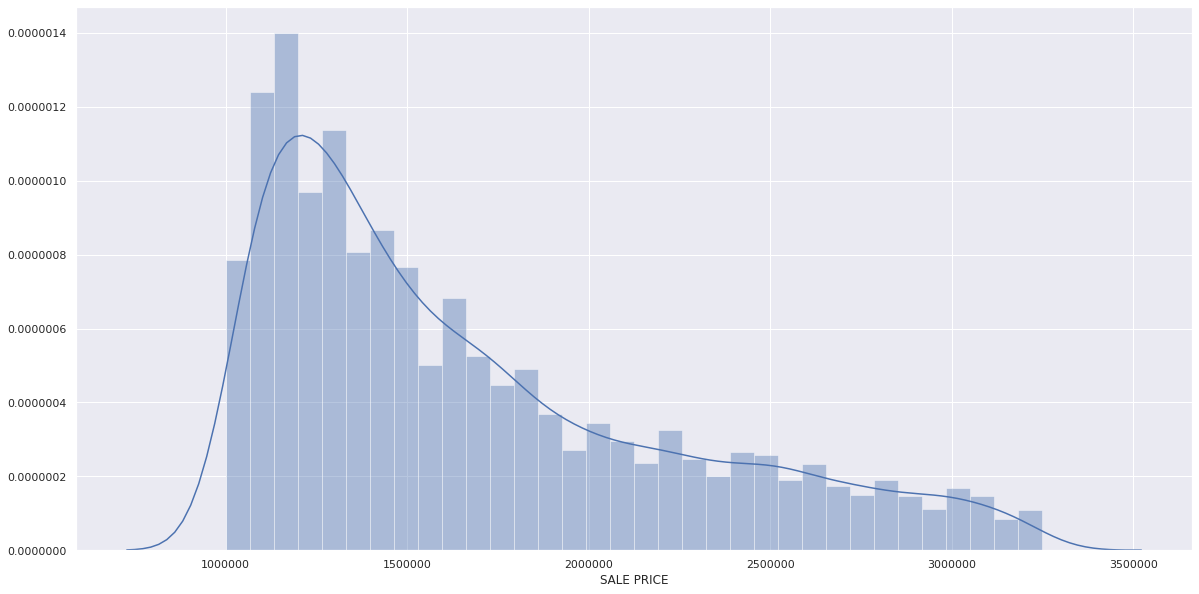

In [7]:
sns.distplot(new_data['SALE PRICE'])

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

In [0]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
acc = lin_reg.score(x_test, y_test)
y_pred = lin_reg.predict(x_test)

In [10]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 434937.0140702202
MSE: 299599720736.5132
RMSE: 547357.0322344577


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

In [12]:
# Ridge
ridge=Ridge(alpha=1.0)
ridge.fit(x,y)
print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))
y_pred = ridge.predict(x_train)
print('RMSE train:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
y_pred = ridge.predict(x_test)
print('RMSE test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.07981711265309432
0.07417576302852713
RMSE train: 537459.1421722058
RMSE test: 543136.7641097768


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

In [14]:
# Lasso
lasso=Lasso(alpha=1.0)
lasso.fit(x,y)
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))
y_pred = lasso.predict(x_train)
print('RMSE train:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
y_pred = lasso.predict(x_test)
print('RMSE test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.07981361567626932
0.07418100904814184
RMSE train: 537460.163425918
RMSE test: 543135.2253132967


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

In [16]:
# Elastic Net
elastic_net=ElasticNet(alpha=1.0)
elastic_net.fit(x,y)
print(elastic_net.score(x_train, y_train))
print(elastic_net.score(x_test, y_test))
y_pred = elastic_net.predict(x_train)
print('RMSE train:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
y_pred = elastic_net.predict(x_test)
print('RMSE test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.07481267027336391
0.06517901927843506
RMSE train: 538918.6543382534
RMSE test: 545769.3634269175
